In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.indexers import BaseIndexer

In [4]:
gspc = pd.read_csv("GSPC.csv", index_col=0, parse_dates=True)

In [5]:
gspc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


Date
1927-12-30    17.660000
1928-01-03    17.760000
1928-01-04    17.719999
1928-01-05    17.549999
1928-01-06    17.660000
Name: Adj Close, dtype: float64

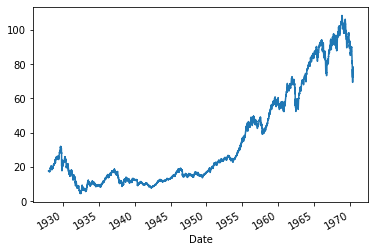

In [59]:
gspc["Close"].plot()

In [55]:
class ForwardIndexer(BaseIndexer):
    def get_window_bounds(self, num_values, min_periods, center, closed):
        start = np.empty(num_values, dtype=np.int64)
        end = np.empty(num_values, dtype=np.int64)
        for i in range(num_values):
            start[i] = 0
            end[i] = i
        return start, end

In [84]:
historical_average = gspc["Close"].rolling(ForwardIndexer()).mean()

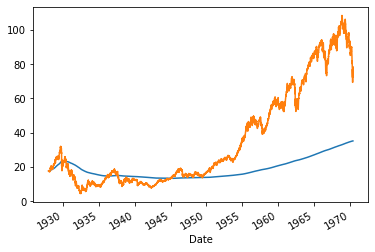

In [73]:
pl = historical_average.plot()
gspc["Close"].plot(ax=pl)

In [91]:
infl = [ (100 + 3.2 *  (x / 365)) / 100 for x in list(range(len(historical_average))) ]

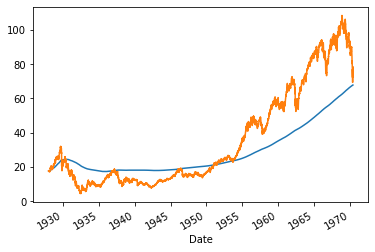

In [92]:
pl = (historical_average * infl).plot()
gspc["Close"].plot(ax=pl)